<a href="https://colab.research.google.com/github/yoonputer/test_deeplearning/blob/master/NaverSentimentAnalysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -O https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.9M  100 13.9M    0     0  89.4M      0 --:--:-- --:--:-- --:--:-- 89.4M


In [2]:
!curl -O https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4778k  100 4778k    0     0  44.8M      0 --:--:-- --:--:-- --:--:-- 44.8M


In [3]:
import pandas as pd

In [4]:
train_data = pd.read_table('./ratings_train.txt')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [5]:
train_data.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [6]:
train_data.dropna(inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [7]:
train_data['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [8]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 58.6 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 448 kB 58.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [9]:
import konlpy

In [10]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [13]:
okt = konlpy.tag.Okt()
okt.morphs('와 이런것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이런', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [12]:
train_data_small = train_data[0:300]

In [35]:
Y_train = train_data['label'][0:300]
print(Y_train)

0      0
1      1
2      0
3      0
4      1
      ..
295    1
296    0
297    0
298    0
299    1
Name: label, Length: 300, dtype: int64


In [15]:
x_train = list()
okt = konlpy.tag.Okt()
for sentence in train_data_small['document']: 
  temp_x = okt.morphs(sentence, stem=True)
  words = list()
  for tok in temp_x:
    if tok not in stopwords:
      words.append(tok)
  x_train.append(words)

x_train[3:5]

[['교도소', '이야기', '구먼', '..', '솔직하다', '재미', '없다', '..', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '!',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다']]

In [16]:
import tensorflow as tf

In [20]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_train)

In [21]:
print(tokenizer.word_index)

{'.': 1, '영화': 2, '보다': 3, '..': 4, '...': 5, '없다': 6, '이다': 7, ',': 8, '을': 9, '있다': 10, '?': 11, '다': 12, '정말': 13, '만': 14, '연기': 15, '!': 16, '너무': 17, '진짜': 18, '않다': 19, '나오다': 20, '안': 21, '....': 22, '인': 23, '적': 24, '내': 25, '하고': 26, '점': 27, '에서': 28, '좋다': 29, '아니다': 30, '같다': 31, '재밌다': 32, '요': 33, '아': 34, '보고': 35, '시간': 36, '하나': 37, '그': 38, '드라마': 39, '감동': 40, '되다': 41, '왜': 42, '재미있다': 43, '평점': 44, '로': 45, '사람': 46, '볼': 47, 'ㅋㅋ': 48, '싶다': 49, '~': 50, '고': 51, '게': 52, '말': 53, '나': 54, '아깝다': 55, '것': 56, '그냥': 57, '이건': 58, '완전': 59, '최고': 60, '내용': 61, '만들다': 62, '-': 63, '느낌': 64, '작품': 65, '더': 66, '기': 67, '못': 68, '재미없다': 69, '별로': 70, 'ㅡㅡ': 71, '모르다': 72, '들다': 73, '또': 74, '^^': 75, '생각': 76, '정도': 77, '알다': 78, '줄': 79, '재미': 80, '때': 81, 'ㅠㅠ': 82, '듯': 83, '지루하다': 84, '수': 85, '2': 86, '다시': 87, "'": 88, '10': 89, '이렇다': 90, '사랑': 91, '감독': 92, '주인공': 93, '가다': 94, '1': 95, '별': 96, '!!': 97, '임': 98, '스토리': 99, '끄다': 100, '난': 101, '하': 102, '자다': 

In [22]:
len(tokenizer.word_index)

1572

In [23]:
X_train = tokenizer.texts_to_sequences(x_train)
print(X_train[3:5])

[[523, 146, 524, 4, 188, 80, 6, 4, 44, 525], [526, 527, 38, 528, 15, 292, 2, 16, 529, 28, 530, 118, 531, 532, 293, 189, 118]]


In [26]:
len(X_train[0]), len(X_train[1])

(6, 13)

In [27]:
hist = list()
for sent in X_train:
  hist.append(len(sent))

print(hist)

[6, 13, 8, 10, 17, 22, 6, 38, 7, 16, 8, 16, 15, 20, 21, 7, 24, 12, 17, 15, 13, 5, 43, 9, 5, 15, 6, 3, 1, 16, 21, 10, 6, 9, 6, 8, 8, 10, 7, 7, 4, 29, 6, 14, 30, 8, 45, 19, 5, 57, 17, 15, 13, 16, 1, 2, 1, 32, 3, 4, 7, 9, 10, 28, 14, 44, 27, 13, 10, 10, 8, 33, 1, 7, 4, 14, 7, 3, 27, 4, 14, 3, 18, 8, 4, 5, 3, 4, 6, 11, 7, 8, 2, 9, 5, 9, 4, 6, 6, 11, 14, 9, 9, 9, 5, 13, 1, 3, 13, 11, 11, 13, 7, 1, 16, 3, 6, 5, 10, 4, 33, 18, 8, 5, 3, 7, 8, 18, 41, 11, 3, 5, 4, 10, 11, 10, 11, 7, 14, 15, 1, 15, 46, 3, 4, 5, 40, 22, 13, 43, 10, 1, 11, 4, 3, 4, 24, 11, 6, 2, 6, 13, 6, 38, 56, 16, 4, 13, 10, 2, 30, 45, 6, 6, 4, 18, 6, 4, 14, 9, 38, 9, 34, 5, 14, 1, 4, 8, 27, 6, 4, 16, 11, 20, 20, 14, 5, 20, 16, 27, 9, 11, 6, 48, 17, 8, 13, 3, 13, 7, 4, 7, 7, 13, 4, 11, 13, 11, 12, 10, 28, 8, 18, 7, 5, 13, 8, 7, 25, 9, 37, 9, 55, 48, 8, 6, 10, 17, 9, 8, 10, 10, 16, 12, 19, 7, 10, 6, 5, 8, 15, 3, 7, 2, 12, 8, 8, 5, 15, 6, 24, 5, 19, 16, 6, 6, 30, 12, 9, 6, 2, 10, 5, 12, 8, 17, 19, 3, 1, 11, 32, 11, 14, 35, 7, 9, 

In [28]:
import matplotlib.pyplot as plt

(array([95., 96., 50., 20., 10.,  9.,  7.,  6.,  4.,  3.]),
 array([ 1. ,  6.6, 12.2, 17.8, 23.4, 29. , 34.6, 40.2, 45.8, 51.4, 57. ]),
 <a list of 10 Patch objects>)

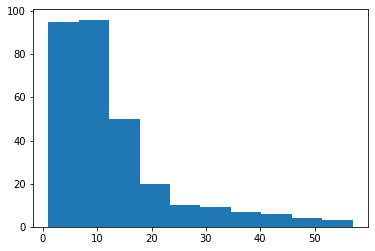

In [29]:
plt.hist(hist)

In [32]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=50)
X_train[3:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 523, 146, 524,   4, 188,  80,   6,   4,  44, 525],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 526, 527,  38, 528,  15, 292,
          2,  16, 529,  28, 530, 118, 531, 532, 293, 189, 118]],
      dtype=int32)

In [36]:
Y_train.shape, X_train.shape

((300,), (300, 50))

In [37]:
import numpy as np
np.unique(Y_train)

array([0, 1])

In [38]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(1572, 50)) # input layer
model.add(tf.keras.layers.LSTM(64, activation='tanh')) # hidden layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid')) # output layer


model.compile(optimizer='adam', loss='binary_crossentropy') # gadget

In [ ]:
model.fit(X_train,Y_train)